In [1]:
import rpy2.robjects as robjects
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from common_tools import r_import_tool as r_in
from common_tools import plotting_tools as ploto
from common_tools import plotting_multivar as plotmulti

Load the RData file with raw data, models and modeldata, and convert to pandas format

In [20]:
robjects.r['load']('./data/data_r_in_num.RData')

d_in = r_in.import_rdata('d_in',0,'surveydata')
d_in_s = r_in.import_rdata('d_in_s',0,'surveydata_standardised')

In [34]:
# Load models
robjects.r['load']('./data/modeldata_real_out.RData')

model_moverall = r_in.import_rdata('data_moverall', 1, 'moverall')
model_mprereq = r_in.import_rdata('data_mprereq', 1, 'mprereq')
model_mlearningout = r_in.import_rdata('data_mlearningout', 1, 'mlearningout')
model_mstruct = r_in.import_rdata('data_mstruct', 1, 'mstruct')
model_mteach = r_in.import_rdata('data_mteach', 1, 'mteach')
model_mlit = r_in.import_rdata('data_mlit', 1, 'mlit')
model_massess = r_in.import_rdata('data_massess', 1, 'massess')
model_madmin = r_in.import_rdata('data_madmin', 1, 'madmin')
model_mwork = r_in.import_rdata('data_mwork', 1, 'mwork')
model_mequal = r_in.import_rdata('data_mequal', 1, 'mequal')
model_mreturn = r_in.import_rdata('data_mreturn', 1, 'mreturn')

# Load model data
robjects.r['load']('./data/model_real_out.RData')

data_moverall = r_in.import_rdata('data_moverall', 1, 'moverall')
data_mprereq = r_in.import_rdata('data_mprereq', 1, 'mprereq')
data_mlearningout = r_in.import_rdata('data_mlearningout', 1, 'mlearningout')
data_mstruct = r_in.import_rdata('data_mstruct', 1, 'mstruct')
data_mteach = r_in.import_rdata('data_mteach', 1, 'mteach')
data_mlit = r_in.import_rdata('data_mlit', 1, 'mlit')
data_massess = r_in.import_rdata('data_massess', 1, 'massess')
data_madmin = r_in.import_rdata('data_madmin', 1, 'madmin')
data_mwork = r_in.import_rdata('data_mwork', 1, 'mwork')
data_mequal = r_in.import_rdata('data_mequal', 1, 'mequal')
data_mreturn = r_in.import_rdata('data_mreturn', 1, 'mreturn')

Make barplots and violinplots of the parameters

In [55]:
def plot_pretty_boxplot_multivar(dataframe, filename, xdown, xup, label, palette):
      
      import seaborn as sns
      import matplotlib.pyplot as plt

      # Initialize the figure
      f, ax = plt.subplots(figsize=(5, 6))

      # Add in points to show each observation
      # sns.stripplot(data=dataframe, x=data_name, y="model",
      #            size=0.5, color=".3", linewidth=0)
      
      # Plot the parameter values with horizontal boxes
      sns.boxplot(data=dataframe, orient="h", whis=[0, 100], width=.3, palette=palette,
        whiskerprops=dict(color="black"),
        boxprops=dict(edgecolor='black'),
        capprops=dict(color="black"),
        medianprops=dict(color="black"))
      
      ax.set_xlim(xdown, xup)
      
      plt.grid("True")
      #plt.subplots_adjust(bottom=3, top=4, left=2, right=3)
      plt.subplots_adjust(bottom=0.15, left=0.4)
      plt.xlabel(label)
      plt.savefig(filename + '.pdf', format='pdf')

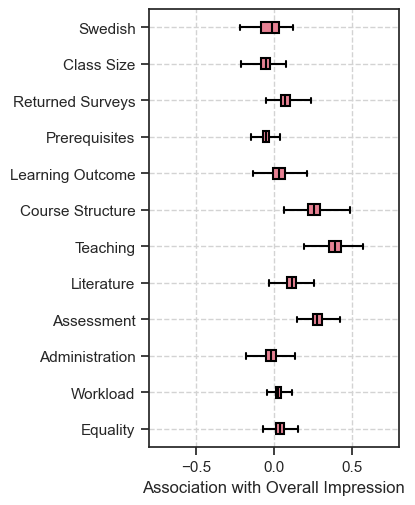

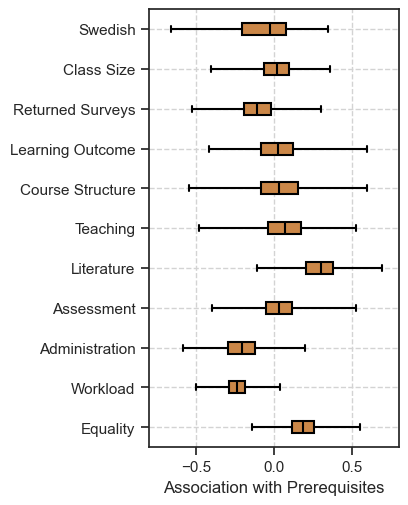

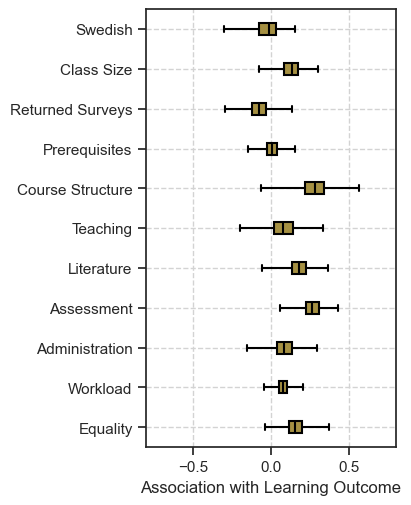

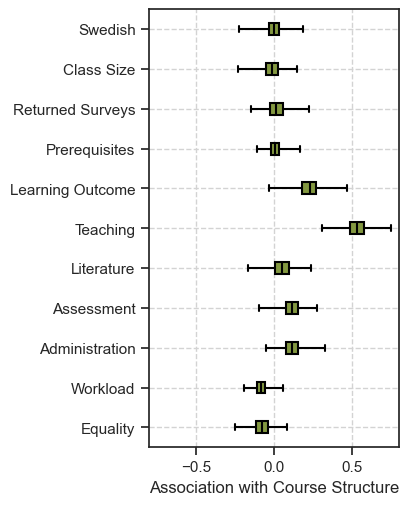

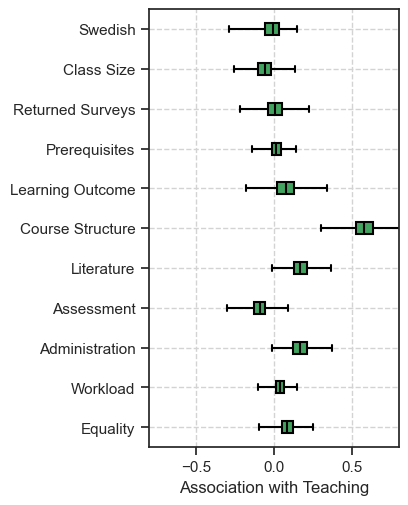

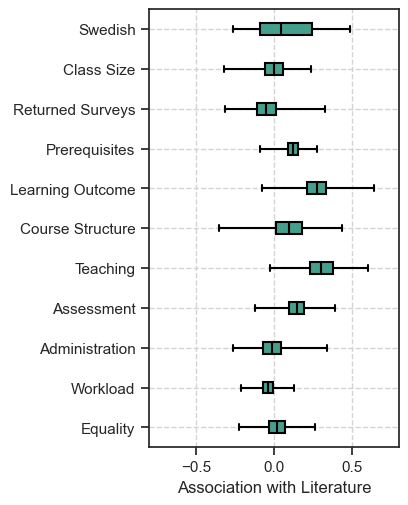

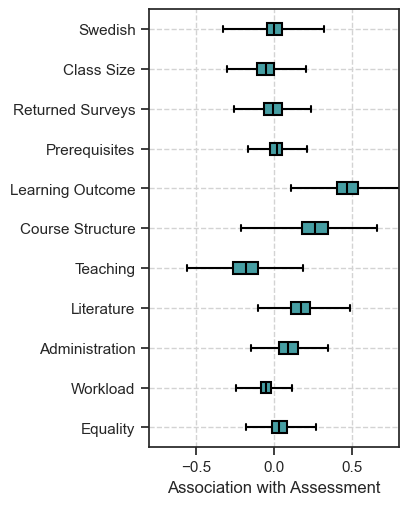

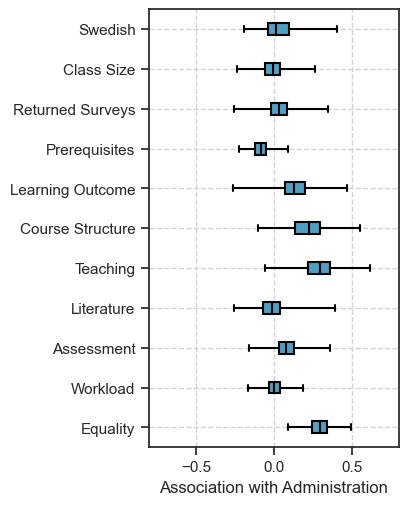

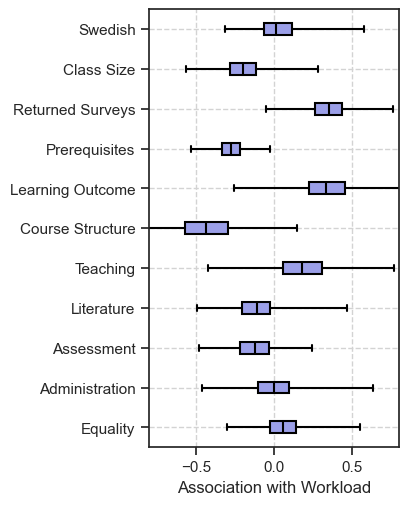

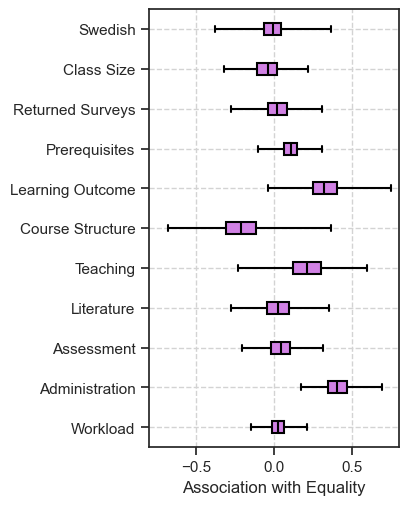

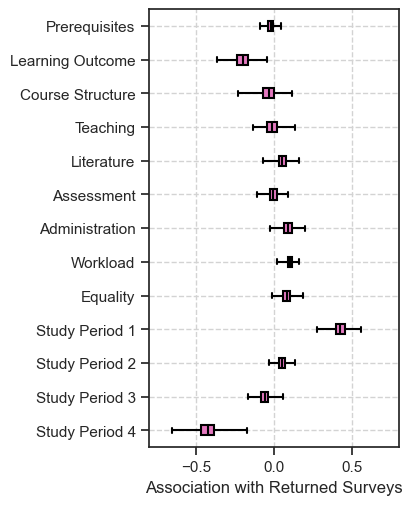

In [56]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

# Generate the "husl" palette with 10 distinct colours
husl_palette = sns.color_palette("husl", 11)


# For data_moverall
model_moverall_subset = model_moverall.drop(columns=["sigma", "model"])
model_moverall_subset.columns = ["Swedish", "Class Size", "Returned Surveys", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_moverall_subset, "moverall", -0.8, 0.8, 'Association with Overall Impression', [husl_palette[0]])

# For data_mprereq
model_mprereq_subset = model_mprereq.drop(columns=["sigma", "model"])
model_mprereq_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mprereq_subset, "mprereq", -0.8, 0.8, 'Association with Prerequisites', [husl_palette[1]])

# For data_mlearningout
model_mlearningout_subset = model_mlearningout.drop(columns=["sigma", "model"])
model_mlearningout_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mlearningout_subset, "mlearningout", -0.8, 0.8, 'Association with Learning Outcome', [husl_palette[2]])

# For data_mstruct
model_mstruct_subset = model_mstruct.drop(columns=["sigma", "model"])
model_mstruct_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mstruct_subset, "mstruct", -0.8, 0.8, 'Association with Course Structure', [husl_palette[3]])

# For data_mteach
model_mteach_subset = model_mteach.drop(columns=["sigma", "model"])
model_mteach_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Course Structure", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mteach_subset, "mteach", -0.8, 0.8, 'Association with Teaching', [husl_palette[4]])

# For data_mlit
model_mlit_subset = model_mlit.drop(columns=["sigma", "model"])
model_mlit_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mlit_subset, "mlit", -0.8, 0.8, 'Association with Literature', [husl_palette[5]])

# For data_massess
model_massess_subset = model_massess.drop(columns=["sigma", "model"])
model_massess_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_massess_subset, "massess", -0.8, 0.8, 'Association with Assessment', [husl_palette[6]])

# For data_madmin
model_madmin_subset = model_madmin.drop(columns=["sigma", "model"])
model_madmin_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_madmin_subset, "madmin", -0.8, 0.8, 'Association with Administration', [husl_palette[7]])

# For data_mwork
model_mwork_subset = model_mwork.drop(columns=["sigma", "model"])
model_mwork_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Equality"]
plot_pretty_boxplot_multivar(model_mwork_subset, "mwork", -0.8, 0.8, 'Association with Workload', [husl_palette[8]])

# For data_mequal
model_mequal_subset = model_mequal.drop(columns=["sigma", "model"])
model_mequal_subset.columns = ["Swedish", "Class Size", "Returned Surveys",  "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload"]
plot_pretty_boxplot_multivar(model_mequal_subset, "mequal", -0.8, 0.8, 'Association with Equality', [husl_palette[9]])

# Centre study period influence
model_mreturn['a'] = (model_mreturn['a'] - model_mreturn['a'].mean())
subvars = np.array_split(model_mreturn['a'], 4)
model_mreturn['a_sp1'] = subvars[0].reset_index(drop=True)
model_mreturn['a_sp2'] = subvars[1].reset_index(drop=True)
model_mreturn['a_sp3'] = subvars[2].reset_index(drop=True)
model_mreturn['a_sp4'] = subvars[3].reset_index(drop=True)
model_mreturn_subset = model_mreturn.drop(columns=["a", "sigma", "model"])
model_mreturn_subset.columns = ["Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Equality", "Study Period 1", "Study Period 2", "Study Period 3", "Study Period 4"]
plot_pretty_boxplot_multivar(model_mreturn_subset, "mreturn", -0.8, 0.8, 'Association with Returned Surveys', [husl_palette[10]])


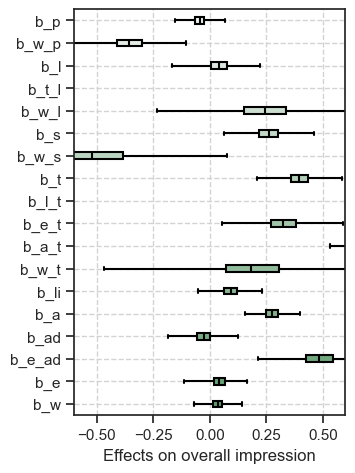

In [9]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

model_mtot_sub = model_mtot.drop(columns=["a_0", "a_w", "a_l", "a_e", "a_a", "a_t", "sigma", "tau_w", "tau_l", "tau_e", "tau_a", "tau_t", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Inequality"]
plot_pretty_boxplot_multivar(model_mtot_sub, "model_mtot", -0.6, 0.6, 'Effects on overall impression', "light:g")

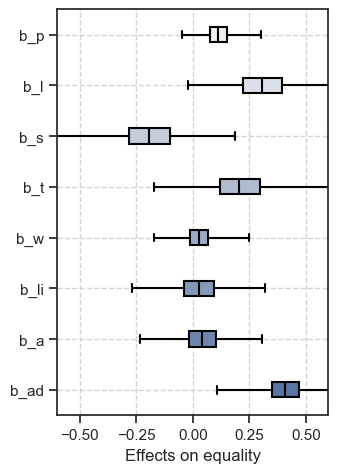

In [12]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

model_mequality_sub = model_mequality_new.drop(columns=["a_0", "sigma", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Inequality"]
plot_pretty_boxplot_multivar(model_mequality_sub, "model_mequality", -0.6, 0.6, 'Effects on equality', "light:b")